# Decision Trees

**Decision Trees** are part of a family of machine learning models known as **Tree-Based Machine Learning Models**. The main goal of this models is to segment the feature space into simple rectangular regions, which is convenient since this allows us to do either regression or classification. For instance, consider the following image:

<img src="iris.png" alt="Drawing" style="width: 400px;"/>

In this case, using two features, petal lenght and petal width, we are using decision trees to distinguish among three types of **iris plants**. The data comes from the famous **iris dataset**, which is one of the many datasets included in the `scikit-learn` library. Image taken from *Raschka, Sebastian, and Vahid Mirjalili, "Python machine learning: Machine learning and deep learning with Python," Second edition, 2017*.

One of the advantages of decision trees is that they are easy to interpret since they produce simple decision rules that can be understood even by a non-technical audience. Based on features in the training data, decision tree models learn a series of questions to infer the class labels of samples. In the following figure, a decision tree is shown that help a person to choose an action by asking yes or no questions.

<img src="tree.png" alt="Drawing" style="width: 500px;"/>

Image taken from *Dangeti, Pratap, "Statistics for machine learning," Packt Publishing Ltd., 2017*.

What about when we have numerical quantities? How does the decision tree know when to split and which feature does the best splitting? In general, this is done using something called **information gain**. Intuitively speaking, given a certain feature, information gain is the expected reduction between the impurity of the parent node and the sum of the child node impurities---the lower the impurity of the child nodes, the larger the information gain. By the way, there are several measures of impurity such as the **Gini index** and **entropy**.

The following figure can give us an intuitive idea about why the lower the impurity the better.

<img src="impure.png" alt="Drawing" style="width: 400px;"/>

Image taken from *Dangeti, Pratap, "Statistics for machine learning," Packt Publishing Ltd., 2017*.

When training a decision tree, the idea is to start with mixed classes and to continue partitioning until each node reaches its observations of purest class. At every stage, the variable with maximum information gain is chosen in a greedy fashion. Given this, decision trees can overfit the data if we do not limit their depth. 

Now we mention some of the advantages of decision trees:

- As mentioned before, trees are very easy to explain to people. In fact, they are even easier to explain than linear regression.
- Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches seen in previous chapters.
- Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to create dummy variables.

Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches [1].

As usual, let us load some libraries

In [4]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

Guess what? We will be using our diabetes dataset again.

In [5]:
diabetes = pd.read_csv('diabetes-dataset.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In the following two cells we process our data to divide it into a training and a test set. In this case the 80% percent of the data will be used for training and the rest for testing. For now we will focous on the training of the decision tree. Notice that in this case we will be using the `train_test_split` method from the `scikit-learn` library.

In [6]:
y = diabetes['Outcome']
X_data = diabetes.copy()
X_data = X_data.drop(columns='Outcome')

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=0)

Now we can train our model.

In [8]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=13)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, random_state=0)

Furthermore, we can visualize the decision tree that we obtained!

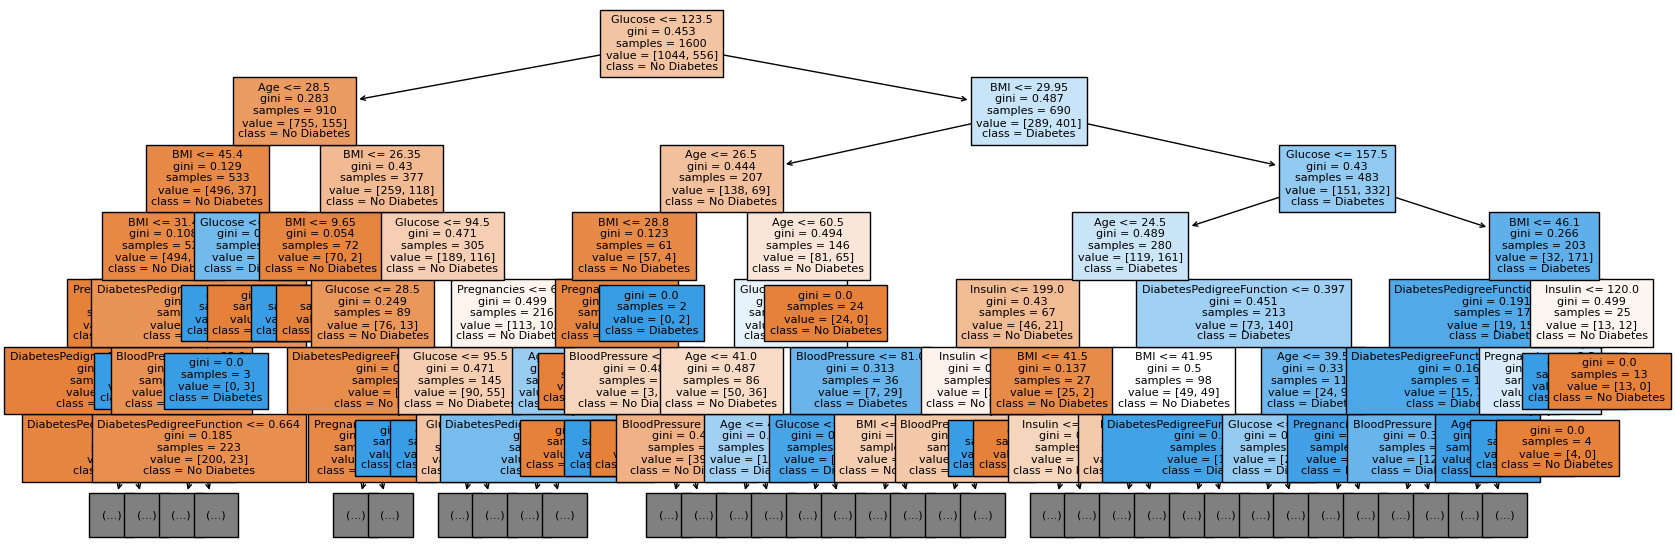

In [9]:
variables = diabetes.columns
plt.figure(figsize=[20,7])
tree.plot_tree(clf, max_depth=6, feature_names=variables, class_names=['No Diabetes', 'Diabetes'], fontsize=8, filled=True)
plt.show()

[1] *James, Gareth, et al., "An introduction to statistical learning," Vol. 112. New York: springer, 2013*.

In [10]:
y_pred = clf.predict(X_train)
hits = sum(y_pred == y_train)
accuracy = hits / len(y_train)
accuracy

1.0

In [11]:
y_pred = clf.predict(X_test)
hits = sum(y_pred == y_test)
accuracy = hits / len(y_test)
accuracy

0.9825